In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#读数据
rides = pd.read_csv('./train.csv',encoding='UTF-8')
rides.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
counts=rides['count'][:50]

In [4]:
x=np.arange(len(counts))
y=np.array(counts)

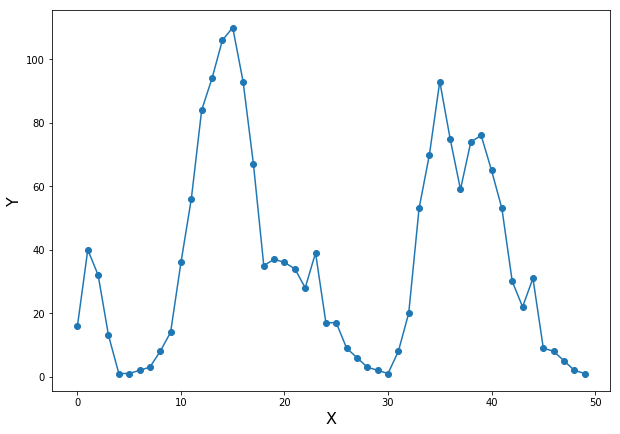

In [5]:
plt.figure(figsize=(10,7))
plt.plot(x,y,marker="o")
plt.xlabel('X',fontsize='16')
plt.ylabel('Y',fontsize='16')
plt.show()

In [6]:
x=Variable(torch.FloatTensor(np.arange(len(counts),dtype=float)/len(counts)))
y=Variable(torch.FloatTensor(np.array(counts,dtype=float)))

In [7]:
sz=10  #设置隐含层神经元数量
weights=Variable(torch.rand(1,sz),requires_grad=True)  #初始化输入层到隐含层的权重矩阵，他的尺寸是(1,10)
biases=Variable(torch.rand(sz),requires_grad=True)      #初始化隐含层节点的偏置向量，他是尺寸为10的一维向量
weights2=Variable(torch.rand(sz,1),requires_grad=True)  #初始化隐含层到输出层的权重矩阵，他的尺寸是(10,1)

In [8]:
learning_rate=0.0001  #设置学习率
losses=[]    #记录每次迭代后的损失函数值
for i in range(1000000):
    
    #从输入层到隐含层的计算
    hidden=x.expand(sz,len(x)).t()*weights.expand(len(x),sz)+biases.expand(len(x),sz)
    #将sigmoid函数作用在隐含层的每一个神经元上
    hidden=torch.sigmoid(hidden)
    #隐含层输出到输出层，计算得到最终预测
    predictions=hidden.mm(weights2)
    # 此时，predictions的尺寸为(50,1)，即50个数据点的预测数值
    # 通过与数据中的标准答案y做比较，计算均方误差
    loss=torch.mean((predictions-y)**2)
    #此时，loss为一个标量，即一个数
    losses.append(loss.data.numpy())
    if i%10000==0: #每隔10000个数打印损失函数的值
        print('loss',loss,'当前运行:',i*100/1000000,'%')
    #梯度下降算法,将误差反向传播
    loss.backward()
    #利用上一步计算中得到的weight,biases等梯度信息更新weights,biases的数值
    weights.data.add_(-learning_rate*weights.grad.data)
    biases.data.add_(-learning_rate*biases.grad.data)
    weights2.data.add_(-learning_rate*weights2.grad.data)
    #清空所有变量的梯度值
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()

loss tensor(2127.9500, grad_fn=<MeanBackward0>) 当前运行: 0.0 %


loss tensor(1011.5461, grad_fn=<MeanBackward0>) 当前运行: 1.0 %


loss tensor(1011.3863, grad_fn=<MeanBackward0>) 当前运行: 2.0 %


loss tensor(1011.2804, grad_fn=<MeanBackward0>) 当前运行: 3.0 %


loss tensor(1011.2053, grad_fn=<MeanBackward0>) 当前运行: 4.0 %


loss tensor(1011.1493, grad_fn=<MeanBackward0>) 当前运行: 5.0 %


loss tensor(1011.1062, grad_fn=<MeanBackward0>) 当前运行: 6.0 %


loss tensor(1011.0724, grad_fn=<MeanBackward0>) 当前运行: 7.0 %


loss tensor(1011.0454, grad_fn=<MeanBackward0>) 当前运行: 8.0 %


loss tensor(1011.0235, grad_fn=<MeanBackward0>) 当前运行: 9.0 %


loss tensor(1011.0062, grad_fn=<MeanBackward0>) 当前运行: 10.0 %


loss tensor(1010.9923, grad_fn=<MeanBackward0>) 当前运行: 11.0 %


loss tensor(1010.9812, grad_fn=<MeanBackward0>) 当前运行: 12.0 %


loss tensor(1010.9724, grad_fn=<MeanBackward0>) 当前运行: 13.0 %


loss tensor(1010.9654, grad_fn=<MeanBackward0>) 当前运行: 14.0 %


loss tensor(1010.9602, grad_fn=<MeanBackward0>) 当前运行: 15.0 %


loss tensor(1010.9562, grad_fn=<MeanBackward0>) 当前运行: 16.0 %


loss tensor(1010.9534, grad_fn=<MeanBackward0>) 当前运行: 17.0 %


loss tensor(1010.9512, grad_fn=<MeanBackward0>) 当前运行: 18.0 %


loss tensor(1010.9495, grad_fn=<MeanBackward0>) 当前运行: 19.0 %


loss tensor(1010.9483, grad_fn=<MeanBackward0>) 当前运行: 20.0 %


loss tensor(1010.9476, grad_fn=<MeanBackward0>) 当前运行: 21.0 %


loss tensor(1010.9470, grad_fn=<MeanBackward0>) 当前运行: 22.0 %


loss tensor(1010.9467, grad_fn=<MeanBackward0>) 当前运行: 23.0 %


loss tensor(1010.9465, grad_fn=<MeanBackward0>) 当前运行: 24.0 %


loss tensor(1010.9462, grad_fn=<MeanBackward0>) 当前运行: 25.0 %


loss tensor(1010.9460, grad_fn=<MeanBackward0>) 当前运行: 26.0 %


loss tensor(1010.9461, grad_fn=<MeanBackward0>) 当前运行: 27.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 28.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 29.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 30.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 31.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 32.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 33.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 34.0 %


loss tensor(1010.9456, grad_fn=<MeanBackward0>) 当前运行: 35.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 36.0 %


loss tensor(1010.9459, grad_fn=<MeanBackward0>) 当前运行: 37.0 %


loss tensor(1010.9459, grad_fn=<MeanBackward0>) 当前运行: 38.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 39.0 %


loss tensor(1010.9459, grad_fn=<MeanBackward0>) 当前运行: 40.0 %


loss tensor(1010.9457, grad_fn=<MeanBackward0>) 当前运行: 41.0 %


loss tensor(1010.9456, grad_fn=<MeanBackward0>) 当前运行: 42.0 %


loss tensor(1010.9457, grad_fn=<MeanBackward0>) 当前运行: 43.0 %


loss tensor(1010.9457, grad_fn=<MeanBackward0>) 当前运行: 44.0 %


loss tensor(1010.9457, grad_fn=<MeanBackward0>) 当前运行: 45.0 %


loss tensor(1010.9457, grad_fn=<MeanBackward0>) 当前运行: 46.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 47.0 %


loss tensor(1010.9457, grad_fn=<MeanBackward0>) 当前运行: 48.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 49.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 50.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 51.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 52.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 53.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 54.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 55.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 56.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 57.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 58.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 59.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 60.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 61.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 62.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 63.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 64.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 65.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 66.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 67.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 68.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 69.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 70.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 71.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 72.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 73.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 74.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 75.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 76.0 %


loss tensor(1010.9459, grad_fn=<MeanBackward0>) 当前运行: 77.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 78.0 %


loss tensor(1010.9459, grad_fn=<MeanBackward0>) 当前运行: 79.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 80.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 81.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 82.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 83.0 %


loss tensor(1010.9457, grad_fn=<MeanBackward0>) 当前运行: 84.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 85.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 86.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 87.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 88.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 89.0 %


loss tensor(1010.9457, grad_fn=<MeanBackward0>) 当前运行: 90.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 91.0 %


loss tensor(1010.9457, grad_fn=<MeanBackward0>) 当前运行: 92.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 93.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 94.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 95.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 96.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 97.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 98.0 %


loss tensor(1010.9458, grad_fn=<MeanBackward0>) 当前运行: 99.0 %


Text(0,0.5,'Loss')

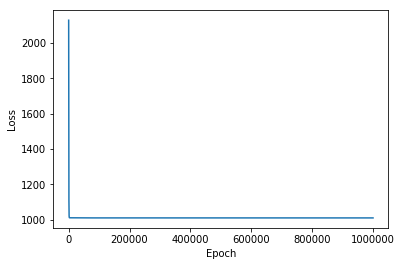

In [9]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

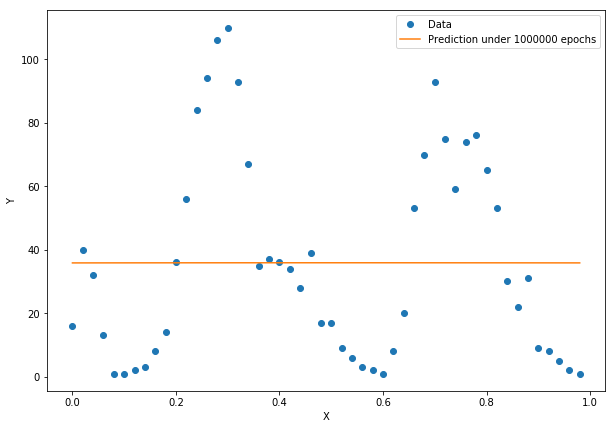

In [10]:
x_data=x.data.numpy()
plt.figure(figsize=(10,7))
xplot,=plt.plot(x_data,y.data.numpy(),'o')
yplot,=plt.plot(x_data,predictions.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([xplot,yplot],['Data','Prediction under 1000000 epochs'])
plt.show()

In [11]:
counts_predict=rides['count'][50:100]
x=Variable(torch.FloatTensor(np.arange(len(counts_predict),dtype=float)+len(counts))/len(counts))
y=Variable(torch.FloatTensor(np.array(counts_predict,dtype=float)))
hidden=x.expand(sz,len(x)).t()*weights.expand(len(x),sz)
predictions=hidden.mm(weights2)
loss=torch.mean((predictions-y)**2)


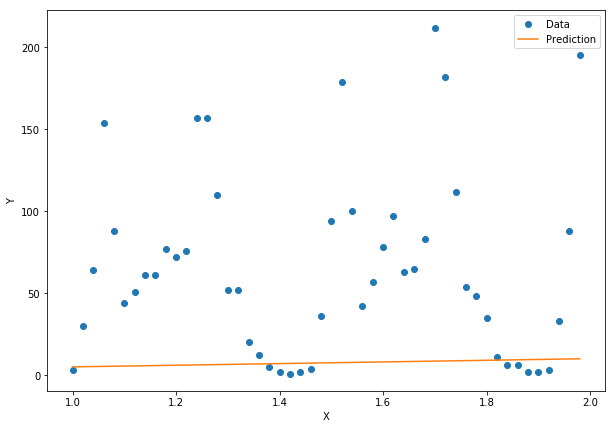

In [12]:
x_data=x.data.numpy()
plt.figure(figsize=(10,7))
xplot,=plt.plot(x_data,y.data.numpy(),'o')
yplot,=plt.plot(x_data,predictions.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([xplot,yplot],['Data','Prediction'])
plt.show()

In [24]:
dummy_fields=['season','holiday','workingday','weather']
for each in dummy_fields:
    dummies=pd.get_dummies(rides[each],prefix=each,drop_first=False)
    rides=pd.concat([rides,dummies],axis=1)
fields_to_drop=['season','holiday','workingday','weather']
data=rides.drop(fields_to_drop,axis=1)

In [25]:
rides.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,1,0,1,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,0,1,0,1,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,0,1,0,1,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,0,1,0,1,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,0,1,0,1,0,1,0,0,0


In [27]:
quant_features=['humidity','windspeed','casual','registered']
scaled_features={}
for each in quant_features:
    mean,std=data[each].mean(),data[each].std()
    scaled_features[each]=[mean,std]
    data.loc[:,each]=(data[each]-mean)/std

E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [28]:
test_data=data[-21*24]
train_data=data[:-21*24]
target_fields=['count','casual','registered']
features,targets=train_data.drop(target_fields,axis=1),train_data[target_fields]
test_features,test_targets=test_data.drop(target_fields,axis=1),test_data[target_fields]
X=features.values
Y=targets['cnt'].values
Y=Y.astype(float)
Y=np.reshape(Y,[len(Y),1])
losses=[]

KeyError: -504